**Klasifikasi Bayi Stunting**

Rincian Kolom Dataset:

Umur (Bulan): Mengindikasikan usia balita dalam bulan. Rentang usia ini penting untuk menentukan fase pertumbuhan anak dan membandingkannya dengan standar pertumbuhan yang sehat. (Umur 0 sampai 60 bulan)

Jenis Kelamin: Terdapat dua kategori dalam kolom ini, 'laki-laki' (male) dan 'perempuan' (female). Jenis kelamin merupakan faktor penting dalam analisis pola pertumbuhan dan risiko stunting.

Tinggi Badan: Dicatat dalam centimeter, tinggi badan adalah indikator utama untuk menilai pertumbuhan fisik balita. Data ini memungkinkan peneliti untuk menentukan apakah pertumbuhan anak sesuai dengan standar usianya.

Status Gizi: Kolom ini dikategorikan menjadi 4 status - 'severely stunting', 'stunting', 'normal', dan 'tinggi'. 'Severely stunting' menunjukkan kondisi sangat serius (<-3 SD), 'stunting' menunjukkan kondisi stunting (-3 SD sd <-2 SD), 'normal' mengindikasikan status gizi yang sehat (-2 SD sd +3 SD), dan 'tinggi' (height) menunjukkan pertumbuhan di atas rata-rata (>+3 SD). Kategori ini membantu dalam identifikasi cepat dan intervensi bagi anak-anak yang berisiko atau mengalami masalah pertumbuhan.

Kategori :
0 = Normal,
1 = Severly Stunting,
2 = Stunting,
3 = Tinggi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

**1. Import Data**

In [ ]:
df = pd.read_csv('/content/data_balita.csv')
df

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
df.shape

(120999, 4)

**2. Cleaning Data**

In [ ]:
df.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [ ]:
df.duplicated().sum()

81574

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(39425, 4)

**3. Exploratory Data Analisys (EDA)**

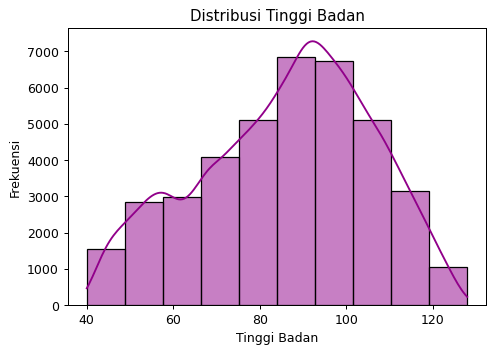

In [ ]:
plt.figure(figsize=(6 , 4))
sns.histplot(data=df, x='Tinggi Badan (cm)', bins=10, kde=True, color='#91008a')
plt.title('Distribusi Tinggi Badan')
plt.xlabel('Tinggi Badan')
plt.ylabel('Frekuensi')
plt.show()

**4. Preparation Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

jk_encoder = LabelEncoder()
df['Jenis Kelamin'] = jk_encoder.fit_transform(df['Jenis Kelamin'])
df['Status Gizi'] = jk_encoder.fit_transform(df['Status Gizi'])

<ipython-input-35-cbf3ef4a9da1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Jenis Kelamin'] = jk_encoder.fit_transform(df['Jenis Kelamin'])
<ipython-input-35-cbf3ef4a9da1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status Gizi'] = jk_encoder.fit_transform(df['Status Gizi'])


In [ ]:
df

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,2
1,0,0,56.705203,3
2,0,0,46.863358,0
3,0,0,47.508026,0
4,0,0,42.743494,1
...,...,...,...,...
120959,60,1,100.700000,0
120967,60,1,113.700000,0
120968,60,1,107.500000,0
120972,60,1,127.600000,3


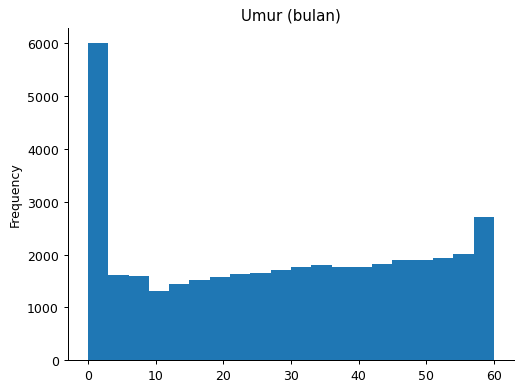

In [ ]:
# @title Umur (bulan)

from matplotlib import pyplot as plt
df['Umur (bulan)'].plot(kind='hist', bins=20, title='Umur (bulan)')
plt.gca().spines[['top', 'right',]].set_visible(False)

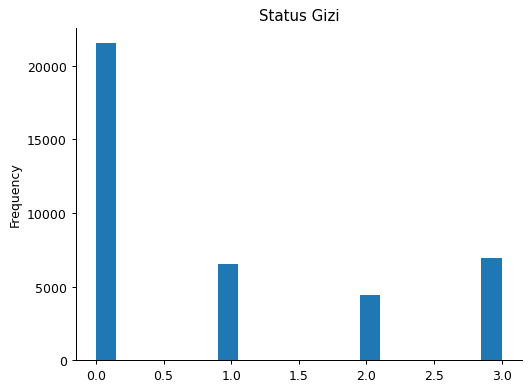

In [ ]:
# @title Status Gizi

from matplotlib import pyplot as plt
df['Status Gizi'].plot(kind='hist', bins=20, title='Status Gizi')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X = df.drop(columns=['Status Gizi'])
y = df['Status Gizi']
print("X : ", X.shape)
print("y : ", y.shape)

X :  (39425, 3)
y :  (39425,)


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**5. Modelling Dan Evaluation**

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

decision_tree_acc = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Akurasi Model Decision Tree : {:.2f}% '.format(decision_tree_acc * 100))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4303
           1       0.99      0.99      0.99      1304
           2       0.97      0.96      0.96       883
           3       0.99      0.99      0.99      1395

    accuracy                           0.99      7885
   macro avg       0.98      0.98      0.98      7885
weighted avg       0.99      0.99      0.99      7885

Akurasi Model Decision Tree : 98.88% 


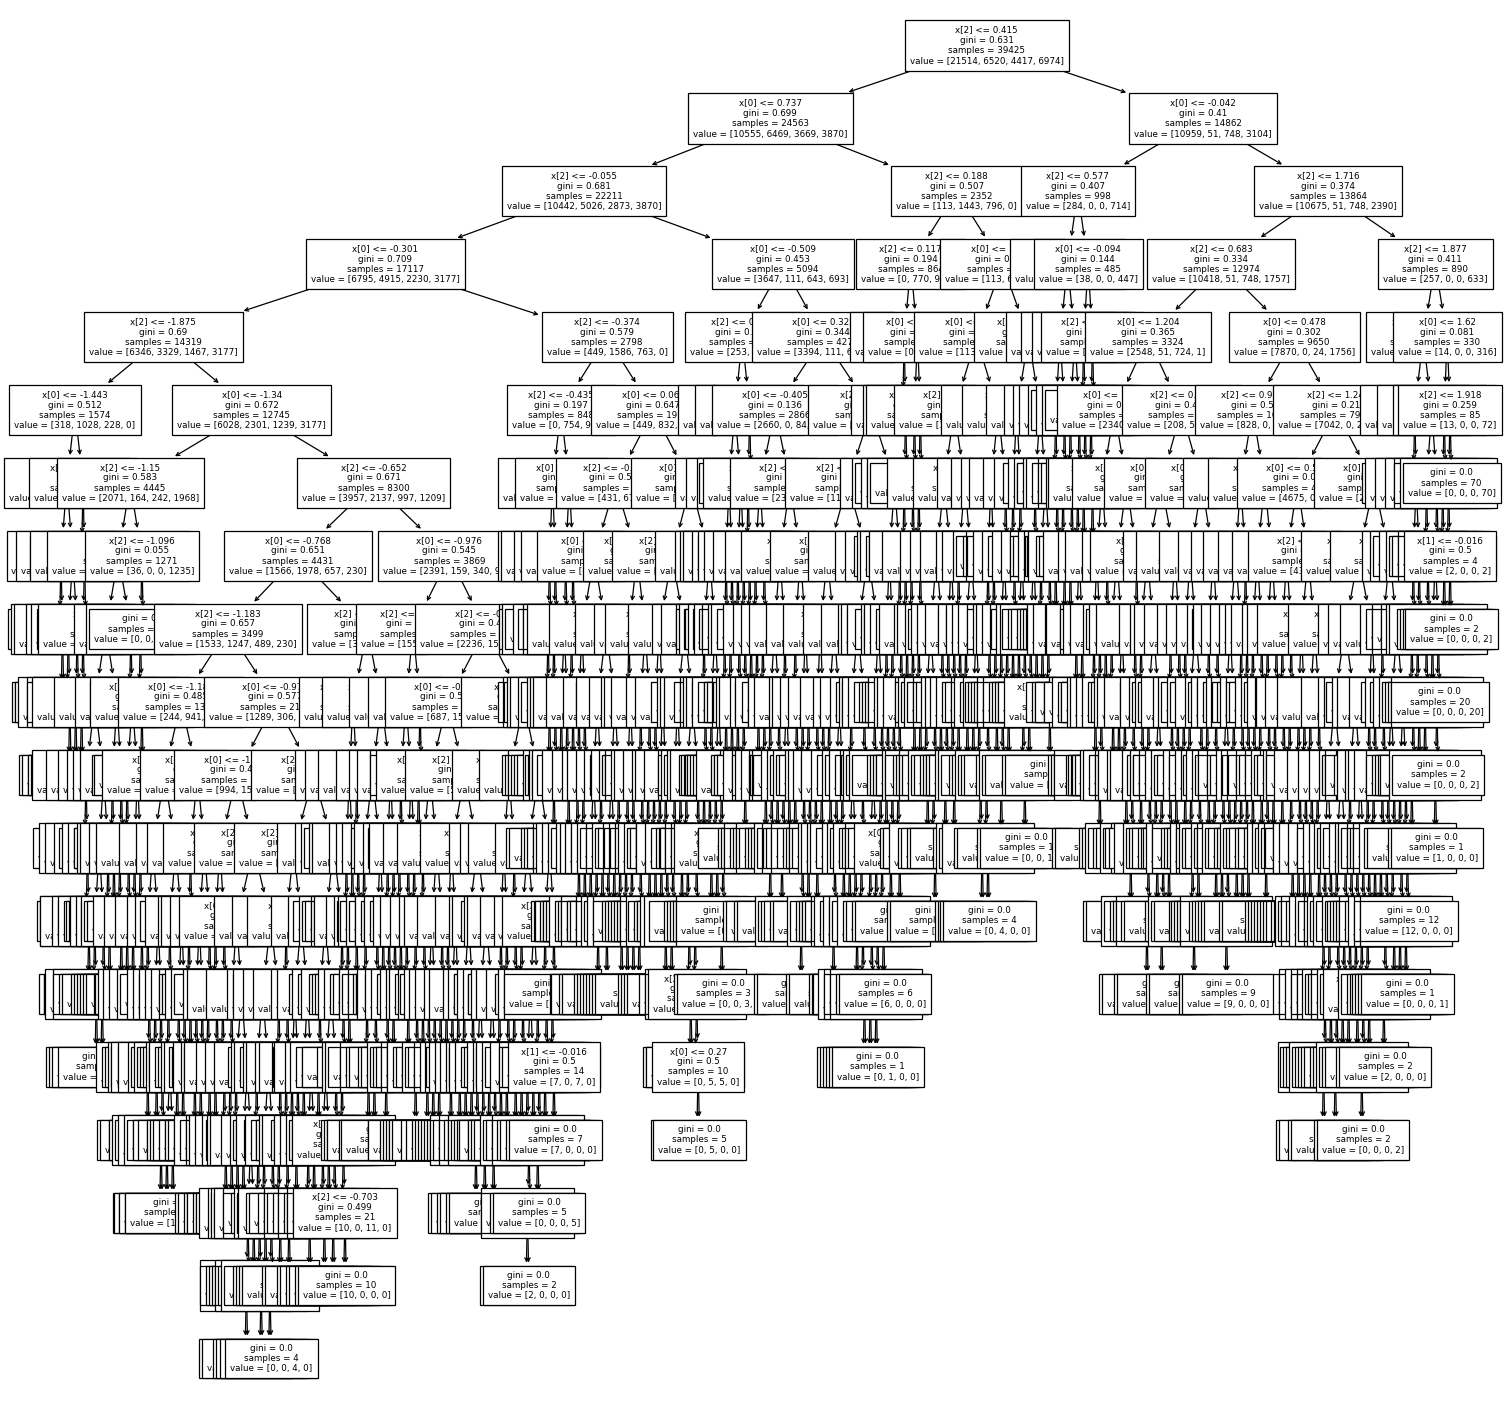

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

model = DecisionTreeClassifier()
model.fit(X, y)

plt.rcParams['figure.dpi'] = 90
plt.subplots(figsize=(20,20))
tree.plot_tree(model, fontsize=7)
plt.show()

**6. Testing**

In [ ]:
new_data = pd.DataFrame({
    'Umur (bulan)': [0],
    'Jenis Kelamin': ["laki-laki"],
    'Tinggi Badan (cm)' : [56.705203]
})

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
new_data['Jenis Kelamin'] = encoder.fit_transform(new_data['Jenis Kelamin'])



In [ ]:
new_data_scaled = scaler.transform(new_data)
prediction = clf.predict(new_data_scaled)
print("Prediksi Status Gizi : ", prediction[0])


Prediksi Status Gizi :  3
